## Свёрточные нейронные нейронные сети
### Примеры некоторых фильтров для обработки изображений


Работу выполнила студентка группы НПМмд-01-19 Мальцева Светлана
___

### Цель работы: 

построить фильтры для изображения, аналогичные фильтрам, представленных на [этом](https://programforyou.ru/poleznoe/convolutional-network-from-scratch-part-zero-introduction) сайте.

### Добавим необходимые библиотеки

In [1]:
import torch
import torch.nn as nn
from PIL import Image
from torchvision import transforms

Подключение гугл-диска, чтобы загрузить картинку

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filename = 'drive/My Drive/image.png'
image = Image.open(filename)
image = image.convert('RGB') 

Исходная картинка

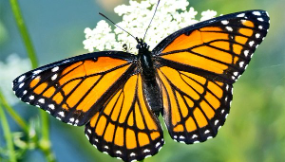

In [4]:
image

Размер изображения

In [5]:
image.size

(285, 162)

### Построение свёрточного слоя

In [6]:
conv_model = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, 
                       padding=1, stride=1, bias=False)
#conv_model.weight

___
Ниже представлен список фильтров `FILTERS` , которые будут использоваться далее.

Сам фильтр, участвующий в обработке изображения будет иметь следующее представление:

$ \begin{bmatrix}
 &  f & \\ 
0 & \cdots  & 0\\ 
0 & \cdots  & 0
\end{bmatrix},$ 
$\begin{bmatrix}
0 &  \cdots &0 \\ 
& f & \\ 
0 & \cdots  & 0
\end{bmatrix},$   $ \begin{bmatrix}
0 &  \cdots &0 \\ 
0 & \cdots & 0\\ 
 & f  & 
\end{bmatrix} .$

Такой вид позволяет обрабатывать каждый канал изображения (R, G, B) независимо.

___
`Повышение резкости`, `Размытие`, и `Размытие Гаусса` нормированы. 

Для повышения резкости делитель подбирался вручную, для двух других фильтров делитель – это сумма всех элементов фильтра.

In [7]:
FILTERS = [[[0.,0,0],[0,1,0],[0,0,0]], 
           [[-1,-2,-1],[0,0,0],[1,2,1]], 
           [[-1,0,1], [-2,0,2], [-1,0,1]], 
           [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]], 
           [[-1/6,-4/6,-1/6], [-4/6,26/6,-4/6], [-1/6,-4/6,-1/6]],
           [[1/9, 1/9, 1/9],[1/9, 1/9, 1/9],[1/9, 1/9, 1/9]],
           [[1/16, 2/16, 1/16],[2/16, 4/16, 2/16],[1/16, 2/16, 1/16]],
           ]

NAMES = ['Без изменений',
         'Выделение границ по X',
         'Выделение границ по Y',
         'Выделение границ', 
         'Повышение резкости', 
         'Размытие', 
         'Размытие Гаусса']

Без изменений


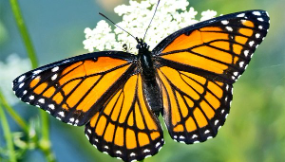

Выделение границ по X


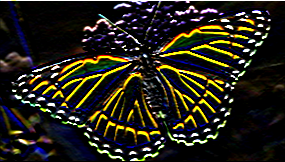

Выделение границ по Y


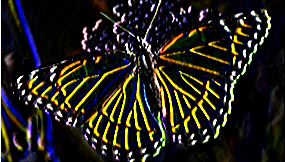

Выделение границ


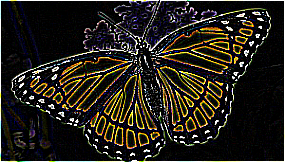

Повышение резкости


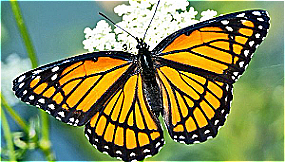

Размытие


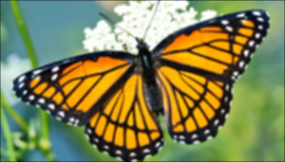

Размытие Гаусса


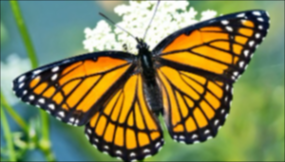

In [8]:
zeros = [[0] * 3 ]* 3     # список из нулей; будет обозначать отсутствие фильтра

for f in FILTERS:

    W = torch.tensor([[f,
                  zeros,  # R
                  zeros],
                 
                 [zeros, 
                  f,      # G
                  zeros],
                 
                 [zeros, 
                 zeros,   # B
                  f]], dtype=torch.float)
  
    with torch.no_grad():
        conv_model.weight.copy_(W)
        
    tensor_image = transforms.ToTensor()(image)  # картинка -> тензор
    tensor_image = tensor_image.unsqueeze(dim=0) # добавление батча нулевой размерности

    result = conv_model(tensor_image) # применение конволюционной модели

    result[result < 0] = 0  # нижние границы значений
    result[result > 1] = 1  # верхние границы значений

    result = result.squeeze(dim=0) # убавление размерности
    result_image = transforms.ToPILImage()(result) # преобразование в картинку
  
    print(NAMES[FILTERS.index(f)])
    display(result_image)

### Вывод: 

Для построения фильтров был использован свёрточный слой:
 - количество входных каналов 3, потому что картинка трёхканальная (RGB)
 - количество выходных каналов 3, чтобы выход получался цветным
 - размерность ядра (тензора) 3, чтобы повторить пример с сайта
 
Фильтры были заданы таким образом, чтобы обработка каналов изображения проходила независимо;

Часть из фильтров, имеющих только положительные значения, была нормирована.

Далее картинка преобразовывалась в тензор; после применения конволюционного слоя обрабатывались верхние и нижние границы значений (0 и 1); в конце результат обратно преобразовывался в картинку.

#### Изображения после применения фильтров похожи на те, что представлены на [сайте](https://programforyou.ru/poleznoe/convolutional-network-from-scratch-part-zero-introduction). 